This is a trial notebook which is introducing the eurostat python package, source: https://pypi.org/project/eurostat/.
At first import packages as always.

In [1]:
import eurostat

The first step is to read the Eurostat table of contents into a dataframe by ```get_toc_df()``` function. It retrieves the titles, codes and timestamps of all Eurostat datasets.

## Browsing through Eurostat

In [2]:
toc_df = eurostat.get_toc_df()
toc_df

,title,code,type,last update of data,last table structure change,data start,data end
0,Gross weight of goods transported to/from main...,MAR_GO_AM_SE,dataset,2010-02-26T23:00:00+0100,2023-07-27T23:00:00+0200,1997,2022
1,Gross weight of goods transported to/from main...,MAR_GO_AM_SI,dataset,2023-08-24T23:00:00+0200,2023-08-24T23:00:00+0200,2001,2022
2,Gross weight of goods transported to/from main...,MAR_GO_AM_TR,dataset,2011-04-11T23:00:00+0200,2023-07-27T23:00:00+0200,2008,2022
3,Gross weight of goods transported to/from main...,MAR_GO_AM_UK,dataset,2010-04-22T11:00:00+0200,2023-11-22T11:00:00+0100,2000,2019
4,Gross weight of goods transported to/from main...,MAR_GO_QM,dataset,2024-03-05T23:00:00+0100,2024-03-05T23:00:00+0100,1997-Q1,2023-Q4
...,...,...,...,...,...,...,...
7644,Percentage of letters delivered on-time (USP u...,POST_CUBE1_X$POST_QOS_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7645,Postal services,POST_CUBE1_X,dataset,2024-03-14T12:05:33Z,2024-03-14T12:05:33Z,2012,2022
7646,Number of enterprises providing postal services,POST_CUBE1_X$NUM701,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7647,Access points (USP under direct or indirect d...,POST_CUBE1_X$POST_ACC_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None


You can filter the datasets by *keyword*. Function ```subset_toc_df()``` extracts the datasets where the title contains *keyword*. Let's pick a keyword, for example ```'science'```.

In [13]:
st_datasets = eurostat.subset_toc_df(toc_df, 'science')
st_datasets

,title,code,type,last update of data,last table structure change,data start,data end
2401,Human resources in science and technology (HRST),TSC00025,dataset,2024-03-14T23:00:00+0100,2024-03-14T23:00:00+0100,2011,2022
4145,Human resources in science and technology (HRS...,TGS00038,dataset,2024-03-15T23:00:00+0100,2024-03-15T23:00:00+0100,2011,2022
5159,"Low achieving 15-year-olds in reading, mathema...",SDG_04_40,dataset,2024-01-03T23:00:00+0100,2024-01-03T23:00:00+0100,2000,2022
5265,"Low achieving 15-year-olds in reading, mathema...",EDUC_OUTC_PISA,dataset,2023-12-14T11:00:00+0100,2024-01-03T23:00:00+0100,2000,2022
5476,"Graduates in tertiary education, in science, m...",EDUC_UOE_GRAD04,dataset,2024-01-26T11:00:00+0100,2024-01-03T23:00:00+0100,2012,2021
5484,"Graduates at doctoral level, in science, math....",EDUC_UOE_GRAD07,dataset,2023-12-12T11:00:00+0100,2024-01-03T23:00:00+0100,2013,2021


Unfortunately, titles are a bit longer so they are not fully visible. Create a dictionary from the ```st_datasets``` dataframe that contains only the title and the code. You can use the [**DataFrame.to_dict**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) function.

In [14]:
st_datasets1 = st_datasets.loc[:, ('title', 'code')]
dict_from_df = st_datasets1.to_dict()
dict_from_df

{'title': {2401: 'Human resources in science and technology (HRST)',
  4145: 'Human resources in science and technology (HRST) by NUTS 2 regions',
  5159: 'Low achieving 15-year-olds in reading, mathematics or science',
  5265: 'Low achieving 15-year-olds in reading, mathematics or science by sex',
  5476: 'Graduates in tertiary education, in science, math., computing, engineering, manufacturing, construction, by sex - per 1000 of population aged 20-29',
  5484: 'Graduates at doctoral level, in science, math., computing, engineering, manufacturing, construction, by sex - per 1000 of population aged 25-34'},
 'code': {2401: 'TSC00025',
  4145: 'TGS00038',
  5159: 'SDG_04_40',
  5265: 'EDUC_OUTC_PISA',
  5476: 'EDUC_UOE_GRAD04',
  5484: 'EDUC_UOE_GRAD07'}}

Now you can see the science datasets titles in their full length. Let's choose the **```'Human resources in science and technology (HRST) by NUTS 2 regions'```** as the working dataset for this notebook.

Use ```get_data_df(code)``` function to read the dataset, specified by its code, into a dataframe.

In [16]:
code = st_datasets1.loc[4145, 'code']
data = eurostat.get_data_df(code)
data

,freq,category,unit,geo\TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,HRST,PC_ACT,AT11,35.8,34.9,37.4,43.5,45.3,45.1,47.2,46.4,48.6,51.4,49.9,50.5
1,A,HRST,PC_ACT,AT12,37.5,37.9,39.2,46.1,47.3,47.1,49.2,49.5,49.1,51.0,52.0,51.2
2,A,HRST,PC_ACT,AT13,46.5,47.4,50.5,56.6,56.1,55.9,56.9,55.5,56.6,57.2,57.9,60.1
3,A,HRST,PC_ACT,AT21,35.9,36.5,37.7,44.2,43.9,45.5,45.3,47.7,47.0,49.1,50.0,49.1
4,A,HRST,PC_ACT,AT22,35.4,36.8,36.2,41.5,43.1,43.7,44.4,45.3,46.0,46.9,46.7,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,A,HRST,PC_ACT,UKM6,45.2,47.6,51.0,48.5,49.0,50.2,52.9,49.8,53.0,NaN,NaN,NaN
337,A,HRST,PC_ACT,UKM7,NaN,NaN,56.5,56.3,57.5,59.3,60.4,59.2,61.4,NaN,NaN,NaN
338,A,HRST,PC_ACT,UKM8,NaN,NaN,52.0,53.0,55.7,58.3,57.0,56.9,60.4,NaN,NaN,NaN
339,A,HRST,PC_ACT,UKM9,NaN,NaN,47.7,49.4,48.9,52.4,52.5,52.1,54.5,NaN,NaN,NaN


Get the column names by ```get_pars(code)``` function and save them in a list ```columns```.

In [17]:
columns = eurostat.get_pars(code)
columns

['freq', 'category', 'unit', 'geo']

Maybe you know what these abbreviations stand for, but it's not 100% clear. Get the full names and meanings of these columns using ```get_dic(code)``` function.

In [18]:
columns_meanings = eurostat.get_dic(code)
columns_meanings

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('category', 'Category', None),
 ('unit', 'Unit of measure', None),
 ('geo',
  'Geopolitical entity (reporting)',
  'This code list defines the reporting geopolitical entities.')]

Now get the values and their meanings of the first 3 columns (```'freq'```, ```'category'```, ```'unit'```) using the same ```get_dic()``` function. You have to provide more parameters in order to get that, so let's break it down:
- ```code```: variable ```code``` that specifies the dataset
- ```par```: for which column you want to get the values and their meanings
- ```full```: boolean parameter that determins whether you want values only in this dataset (```False```) or the list of all possible values (```True```) 
- ```frmt```: format in which you want to get it, there are 3 options = dictionary (```"dict"```), dataframe (```"df"```), list (```"list"```)

In [19]:
column_dict = []
for column in columns[:3]:
    column_dict.append(eurostat.get_dic(code, par=column, full=False, frmt="dict"))
column_dict

[{'A': 'Annual'},
 {'HRST': 'Persons with tertiary education (ISCED) and/or employed in science and technology'},
 {'PC_ACT': 'Percentage of population in the labour force'}]

Save the ```Geopolitical entity``` values and their meanings into a separat dictionary named ```nuts2_dict```.

In [20]:
nuts2_dict = eurostat.get_dic(code, par=columns[3], full=False, frmt="dict")
print(len(nuts2_dict))
nuts2_dict

345


{'EA20': 'Euro area – 20 countries (from 2023)',
 'BE10': 'Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest',
 'BE21': 'Prov. Antwerpen',
 'BE22': 'Prov. Limburg (BE)',
 'BE23': 'Prov. Oost-Vlaanderen',
 'BE24': 'Prov. Vlaams-Brabant',
 'BE25': 'Prov. West-Vlaanderen',
 'BE31': 'Prov. Brabant wallon',
 'BE32': 'Prov. Hainaut',
 'BE33': 'Prov. Liège',
 'BE34': 'Prov. Luxembourg (BE)',
 'BE35': 'Prov. Namur',
 'BG31': 'Severozapaden',
 'BG32': 'Severen tsentralen',
 'BG33': 'Severoiztochen',
 'BG34': 'Yugoiztochen',
 'BG41': 'Yugozapaden',
 'BG42': 'Yuzhen tsentralen',
 'CZ01': 'Praha',
 'CZ02': 'Střední Čechy',
 'CZ03': 'Jihozápad',
 'CZ04': 'Severozápad',
 'CZ05': 'Severovýchod',
 'CZ06': 'Jihovýchod',
 'CZ07': 'Střední Morava',
 'CZ08': 'Moravskoslezsko',
 'DK01': 'Hovedstaden',
 'DK02': 'Sjælland',
 'DK03': 'Syddanmark',
 'DK04': 'Midtjylland',
 'DK05': 'Nordjylland',
 'DE11': 'Stuttgart',
 'DE12': 'Karlsruhe',
 'DE13': 'Freiburg',
 'DE14': 'Tübingen',
 'DE21': 'Oberbayern

In [31]:
at_nuts2 = []
for code, full_name in nuts2_dict.items():
    if 'AT' in code:
        print(f"{code}: {full_name}")

print(at_nuts2)

AT11: Burgenland
AT12: Niederösterreich
AT13: Wien
AT21: Kärnten
AT22: Steiermark
AT31: Oberösterreich
AT32: Salzburg
AT33: Tirol
AT34: Vorarlberg
['Burgenland', 'Niederösterreich', 'Wien', 'Kärnten', 'Steiermark', 'Oberösterreich', 'Salzburg Bundesland', 'Tirol', 'Vorarlberg']


## Plot

In [ ]:
import matplotlib.pyplot as plt

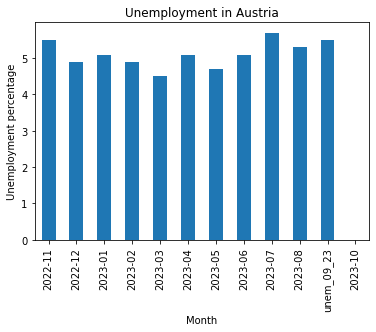

In [28]:
d = data.loc[:, ('Monthly',
                'Seasonally adjusted data, not calendar adjusted data',
                'Total',
                'Total',
                'Percentage of population in the labour force')]
ax = d['Austria'].plot.bar()
ax.set_title('Unemployment in Austria') 
ax.set_xlabel('Month') 
_ = ax.set_ylabel('Unemployment percentage') 

## EU countries GeoDataFrame access through OSMnx

In [4]:
import osmnx as ox
import pandas as pd

Let's create a GeoDataFrame of EU countries.

The first step it to get a list of EU countries names.

In [5]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
                'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
                'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

The [**geocode_to_gdf**](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.geocoder.geocode_to_gdf) function of **OSMnx** package converts geocoding query result to a GeoDataFrame. This query can be also a list of strings and these strings have to be geocodeable place names. Save the GeoDataFrame into the variable ```eu```, print the number of features and plot it.

27


<AxesSubplot:>

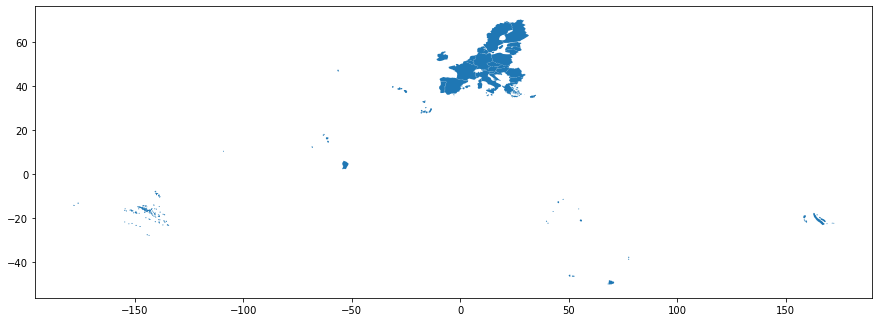

In [6]:
eu = ox.geocode_to_gdf(eu_countries)
print(len(eu))
eu.plot(figsize=(15, 15))

As you can see from the simple plot above, there is a lot of overseas territories that are not necessary for this use case. You can get rid of them. [**Explode**](https://geopandas.org/en/latest/docs/reference/api/geopandas.GeoDataFrame.explode.html) mutlipolygons into single polygons and print the number of features after explosion.

In [7]:
eu_exploded = eu.explode(index_parts=True)
len(eu_exploded)

222

From 27 countries it went to 222 single geometries. That's quite significant. Now you can apply filtering by location as the area of interest is the European mainland. GeoDataFrame "provides coordinate based [**indexing**](https://geopandas.org/en/stable/docs/user_guide/indexing.html) with the ```cx``` indexer, which slices using a bounding box". Select only those polygons which are located east of -15° longitude and north of 32° latitude. Print the number of features again and plot them.

121


<AxesSubplot:>

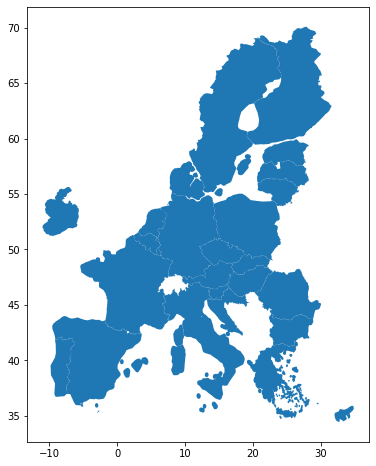

In [8]:
eu_mainland = eu_exploded.cx[-15:, 32:]
print(len(eu_mainland))
eu_mainland.plot(figsize=(8, 8))

In [9]:
eu_mainland = eu_mainland.dissolve(by="name")
print(len(eu_mainland))

27


## EU countries GeoDataFrame download shp

Download of NUTS shapefile using package requests.

In [ ]:
import requests
import os
import zipfile

In [50]:
# URL of the shapefile to download
url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/shp/NUTS_RG_20M_2021_3035.shp.zip"

# Define the file name and path for saving the downloaded file
file_name = "NUTS_RG_20M_2021_3035.shp.zip"
file_path = os.path.join("D:/diplomka/data/", file_name)  # Save in the current directory

File 'NUTS_RG_20M_2021_3035.shp.zip' downloaded successfully!


In [ ]:

# Send a GET request to the URL to download the file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content to a file
    with open(file_path, 'wb') as f:
        f.write(response.content)
    print(f"File '{file_name}' downloaded successfully!")
else:
    print("Failed to download the file.")

In [10]:
import geopandas as gpd

In [11]:
nuts= gpd.read_file('D:/diplomka/data/NUTS_RG_20M_2021_3035.shp.zip')
countries = nuts[nuts['LEVL_CODE'] == 0]
#countries

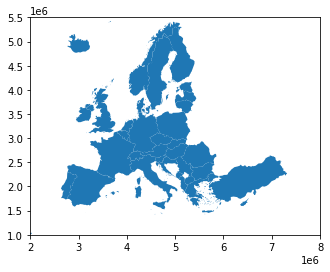

In [12]:
ax = countries.plot()
ax.set_xlim(2000000, 8000000)
_ = ax.set_ylim(1000000, 5500000)

In [36]:
d = data.loc[:, ('Monthly',
                'Seasonally adjusted data, not calendar adjusted data',
                'Total',
                'Total',
                'Percentage of population in the labour force')]

d = d[d.index == 'unem_09_23'].transpose().reset_index()
inverted_dic = dict(map(reversed, dic[5].items()))
d['geo'] = d['geo'].replace(inverted_dic)

""" d_gpd = countries.merge(d, right_on='geo', left_on='NUTS_ID')
print(type(d_gpd))
d_gpd """

print(type(d))
d

<class 'pandas.core.frame.DataFrame'>


,geo,unem_09_23
0,AT,5.5
1,BE,5.6
2,BG,4.5
3,CH,NaN
4,CY,6.2
5,CZ,2.7
6,DE,3.0
7,DK,4.8
8,EA20,6.5
9,EE,7.4


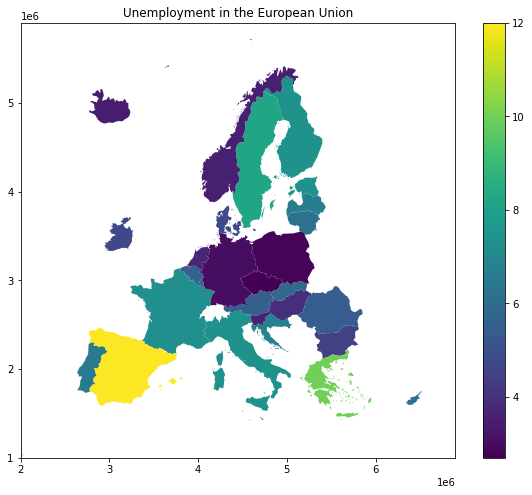

In [151]:
ax = d_gpd.plot(column='unem_09_23', legend=True, figsize=[10,8]) 
ax.set_xlim(2000000, 6900000) 
ax.set_ylim(1000000, 5900000) 
_ = ax.set_title('Unemployment in the European Union')